In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/kaggle/input/rd-dataset/titanic/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
l1=["PassengerId","Cabin","Ticket"]
df.drop(l1,inplace=True,axis=1)

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [7]:
temp=df["Name"].unique()

In [8]:
type(temp)

numpy.ndarray

In [9]:
temp[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

In [10]:
st = []

for i in  temp:
    a= i.split(' ')
    for k in a :
        if '.' in k :
            st.append(k)
            break

In [11]:
st=np.array(st)

In [12]:
df['New_Name']=st

In [13]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,New_Name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.


In [14]:
df["New_Name"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [15]:
l2=["Name"]
df.drop(l2 ,axis=1,inplace=True)

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Name
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.


In [17]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
New_Name      0
dtype: int64

In [18]:
emb=list(df["Embarked"].mode())[0]
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Embarked"].fillna(emb,inplace=True)

In [19]:
emb

'S'

In [20]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
New_Name    0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
le_embarked=LabelEncoder()
le_newName=LabelEncoder()

In [22]:
df["Sex"]=le_sex.fit_transform(df["Sex"])
df["Embarked"]=le_embarked.fit_transform(df["Embarked"])
df["New_Name)"]=le_newName.fit_transform(df["New_Name"])


In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Name,New_Name)
0,0,3,1,22.0,1,0,7.2500,2,Mr.,12
1,1,1,0,38.0,1,0,71.2833,0,Mrs.,13
2,1,3,0,26.0,0,0,7.9250,2,Miss.,9
3,1,1,0,35.0,1,0,53.1000,2,Mrs.,13
4,0,3,1,35.0,0,0,8.0500,2,Mr.,12


In [24]:
l3=["New_Name"]
df.drop(l3 ,axis=1,inplace=True)

In [25]:
df.shape

(891, 9)

In [26]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [27]:
x.shape,y.shape

((891, 8), (891,))

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [29]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((801, 8), (801,), (90, 8), (90,))

In [30]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [32]:
from keras.models import  Sequential
from keras.layers import Dense, Dropout

In [33]:
x_train.shape,y_train.shape

((801, 8), (801,))

In [34]:
#first layer
classifier=Sequential()

In [64]:
classifier.add(Dense(units=64,activation='relu',input_shape=(8,)))
classifier.add(Dropout(rate=0.25))

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
#hidden layer
classifier.add(Dense(units=64,activation='relu'))

In [67]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [68]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                288       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
 dense_4 (Dense)             (None, 64)                128       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
 dense_7 (Dense)             (None, 64)                1

In [70]:
classifier.fit(x_train,y_train,batch_size=32,epochs=100,validation_split=0.1)

Epoch 1/100
23/23 [==============================] - 2s 14ms/step - loss: 0.6355 - accuracy: 0.8556 - val_loss: 0.6051 - val_accuracy: 0.8148
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5507 - accuracy: 0.9042 - val_loss: 0.5546 - val_accuracy: 0.8148
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4717 - accuracy: 0.9056 - val_loss: 0.5131 - val_accuracy: 0.8025
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3918 - accuracy: 0.9056 - val_loss: 0.4745 - val_accuracy: 0.8025
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3436 - accuracy: 0.8903 - val_loss: 0.4831 - val_accuracy: 0.7901
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2821 - accuracy: 0.9069 - val_loss: 0.5031 - val_accuracy: 0.8148
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.2636 - accuracy: 0.9083 - val_loss: 0.5403 - val_accuracy: 0.7901
Epoch 8/100


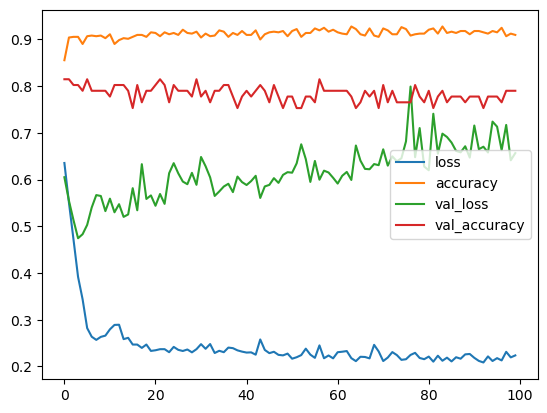

In [71]:
pd.DataFrame(classifier.history.history).plot()
plt.show()

In [72]:
classifier.evaluate(x_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.9273 - accuracy: 0.7333


[0.9273440837860107, 0.7333333492279053]

In [73]:
y_pred=classifier.predict(x_test)
y_pred=y_pred>=0.5
y_pred[:10]

3/3 [==============================] - 0s 4ms/step


array([[False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False]])

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
print(confusion_matrix(y_pred,y_test))

[[43 13]
 [11 23]]


In [81]:
print(y_pred.shape)
count=0
for i in range(y_pred.shape[0]):
    if (y_pred==True and y_test==1)or (y_pred==False and y_test==0):
        count+=1
        print(count/y_pred.shape[0])

(90, 1)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
(54+21)/y_test

In [32]:
clf=RandomForestClassifier(n_estimators=15,n_jobs=-1,max_depth=2)

In [33]:
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=15, n_jobs=-1)

In [34]:
pred=clf.predict(x_test)

In [35]:
clf.score(x_train,y_train)

0.8039950062421972

In [36]:
clf.score(x_test,y_test)

0.7777777777777778

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
print(confusion_matrix(pred,y_test))

[[47 13]
 [ 7 23]]


In [40]:
y_test.shape

(90,)

Boosting

In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [42]:
clf1= AdaBoostClassifier(n_estimators=50,learning_rate=0.6)

In [43]:
clf1.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.6)

In [44]:
pred1=clf1.predict(x_test)

In [45]:
clf1.score(x_train,y_train)

0.8277153558052435

In [46]:
clf1.score(x_test,y_test)

0.7555555555555555

In [47]:
print(confusion_matrix(pred1,y_test))

[[47 15]
 [ 7 21]]


In [48]:
from xgboost import XGBClassifier

In [49]:
clf3=XGBClassifier(n_estimators=10,n_jobs=-1,learning_rate=0.3)

In [50]:
clf3.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [51]:
 pred2=clf3.predict(x_test)

In [52]:
clf3.score(x_train,y_train)

0.885143570536829

In [53]:
clf3.score(x_test,y_test)

0.8222222222222222

In [54]:
print(confusion_matrix(pred2,y_test))

[[46  8]
 [ 8 28]]


In [55]:
from sklearn.metrics import classification_report
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        54
           1       0.78      0.78      0.78        36

    accuracy                           0.82        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.82      0.82      0.82        90



In [189]:
20/(20+13)

0.6060606060606061

In [191]:
52/(52+5)

0.9122807017543859

In [192]:
91+61/2

121.5

In [193]:
(2*0.61*0.89)/(0.91+0.80)

0.6349707602339182

CV and Grid search

In [194]:
from sklearn.model_selection import cross_val_score


In [196]:
cross_val_score(clf3,x_train,y_train,cv=3,n_jobs=-1).mean()

0.8239700374531834

In [197]:
# hyper parameter tunning

In [199]:
from sklearn.model_selection import GridSearchCV

In [200]:
param={
    "learning_rate":[0.1,0.01,0.3,0.6,0.5],
    "max_depth":[1,2,3,4],
    "n_estimators":[5,10.15,20],
}

In [207]:
clf_grid=GridSearchCV(estimator=clf3,param_grid=param,n_jobs=-1,cv=3)

In [208]:
clf_grid.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py", line 1490, in fit
    self._Booster = train(
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 620, in inner_f
 

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=10, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.3, 0.6, 0.5],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [5, 10.15, 20]})

In [210]:
clf_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=-1, num_parallel_tree=None, predictor=None,
              random_state=None, ...)

In [ ]:
clf_grid.best_param